#  Выявление закономерностей определяющих успешность компьютерной игры 

_____
Данное исследование предназначено для выявления закономеностей оределяющих усешность игр. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

______

###### Данное исследование разделено на несколько частей.

* [1.  Изучение файла с данными, получение общей информации.](#section1)
* [2. Подготовка данных.](#section2)
* [3. Исследовательский анализ данных.](#section3)
* [4. Оценка портрета пользователя каждого региона (NA, EU, JP).](#section4)
* [5. Проверка гипотез.](#section5)
* [6. Выводы.](#section6)


<a id='section1'> </a>

## Шаг 1. Изучение файла с данными, получение общей информации

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./datasets/games.csv')
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
# сохраним исходную длину массива в переменной df_len_init
df_len_init = len(df)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Столбцы в данных имеют следующее значение:

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Выводы

1. В данных имеются пропуски их необходимо заполнить
2. В данных есть строкии с нулевыми продажами. Необходимо дополнительно исследовать эти строки
3. Тип столбца User_Score определился как object, а не int64 или float64. Это значит в столбце встречаются строковые значения их необходимо каким-либо образом исключить

<a id='section2'></a>

## Шаг 2. Подготовка данных
Приведем все названия столбцов к нижнему регистру.

In [5]:
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Замена типов данных
Проведем замену типов данных. 
* Столбцам platform, genre и rating установим тип category так как данные столбцы являются категориальными
* Столбцу year_of_release установим тип Int16 так как данные в том столбце - целые числа
* Столбцам na_sales, eu_sales, jp_sales и other_sales устоновим тип float32 так как двойная точность для этих данных является избыточной
* Столбцу critic_score установим тип Int8 так как данные в этом столбце целые и их значение не превышает 127
* Тип столбца user_score пока оставим без изменений. Заменим тип данного столбца после исключения строковых значений

In [6]:
# выведем названия колонок и их текущие типы в виде словаря
df.dtypes.apply(lambda x: x.name).to_dict()

{'name': 'object',
 'platform': 'object',
 'year_of_release': 'float64',
 'genre': 'object',
 'na_sales': 'float64',
 'eu_sales': 'float64',
 'jp_sales': 'float64',
 'other_sales': 'float64',
 'critic_score': 'float64',
 'user_score': 'object',
 'rating': 'object'}

In [7]:
# заменим типы в таблице по словарю df_type_dict
df_type_dict = {'name': 'object',
 'platform': 'category',
 'year_of_release': 'Int16',
 'genre': 'category',
 'na_sales': 'float32',
 'eu_sales': 'float32',
 'jp_sales': 'float32',
 'other_sales': 'float32',
 'critic_score': 'Int8',
 'user_score': 'object',
 'rating': 'category'}

df = df.astype(df_type_dict)

# убедимся что замена прошла так как задумано
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16713 non-null  object  
 1   platform         16715 non-null  category
 2   year_of_release  16446 non-null  Int16   
 3   genre            16713 non-null  category
 4   na_sales         16715 non-null  float32 
 5   eu_sales         16715 non-null  float32 
 6   jp_sales         16715 non-null  float32 
 7   other_sales      16715 non-null  float32 
 8   critic_score     8137 non-null   Int8    
 9   user_score       10014 non-null  object  
 10  rating           9949 non-null   category
dtypes: Int16(1), Int8(1), category(3), float32(4), object(2)
memory usage: 655.3+ KB


Замена типов помогла сократить занимаемую таблицей память более чем в два раза.

### Обработка пропусков
Для начала исследуем столбец user_score.

In [8]:
df['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

В столбце user_score встречается аббревиатура tbd.
TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить.
http://mobilradio.ru/information/vocabulary/tbd.htm

По всей видимости для ряда игр пользовательский рейтинг либо не был указан, либо источник из которого подгружались данные о пользовательском рейтинге оказался недоступен. Заменим tbd в столбце user_score на nan

In [9]:
df['user_score'].mask(df['user_score'] == 'tbd', other=np.nan, inplace=True)

# убедимся что в столбце больше не осталось строк со значением 'tbd'
df['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', nan], dtype=object)

In [10]:
df['user_score'] = df['user_score'].astype('float32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16713 non-null  object  
 1   platform         16715 non-null  category
 2   year_of_release  16446 non-null  Int16   
 3   genre            16713 non-null  category
 4   na_sales         16715 non-null  float32 
 5   eu_sales         16715 non-null  float32 
 6   jp_sales         16715 non-null  float32 
 7   other_sales      16715 non-null  float32 
 8   critic_score     8137 non-null   Int8    
 9   user_score       7590 non-null   float32 
 10  rating           9949 non-null   category
dtypes: Int16(1), Int8(1), category(3), float32(5), object(1)
memory usage: 590.0+ KB


Посмотрим имеются ли проблемы в столбце platform, а за одно и какие платформы преобладают по количеству выпущенных игр на полном наборе данных.

In [11]:
df['platform'].value_counts(normalize=True)

PS2     0.129285
DS      0.128687
PS3     0.079629
Wii     0.078971
X360    0.075501
PSP     0.072330
PS      0.071612
PC      0.058271
XB      0.049297
GBA     0.049177
GC      0.033264
3DS     0.031110
PSV     0.025725
PS4     0.023452
N64     0.019085
XOne    0.014777
SNES    0.014299
SAT     0.010350
WiiU    0.008794
2600    0.007957
NES     0.005863
GB      0.005863
DC      0.003111
GEN     0.001735
NG      0.000718
SCD     0.000359
WS      0.000359
3DO     0.000179
TG16    0.000120
PCFX    0.000060
GG      0.000060
Name: platform, dtype: float64

Наиболее популярными платформами в датасете яаляются PS2 и DS. Только на эти две платформы приходится более четверти игр. Проблем в столбце platform (например названий типа unknown и т.п.) не выявлено. Аналогично рассмотрим столбец с жанром игр.

In [12]:
df['genre'].value_counts(normalize=True)

Action          0.201580
Sports          0.140489
Misc            0.104709
Role-Playing    0.089631
Shooter         0.079160
Adventure       0.077963
Racing          0.074732
Platform        0.053132
Simulation      0.052235
Fighting        0.050799
Strategy        0.040866
Puzzle          0.034704
Name: genre, dtype: float64

Наиболее часто встречающимися жанрами игр являются Action и Sports. На эти два жанра приходится более трети записей.

Посмотрим строки для которых не указано название игры

In [13]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


Можно заметить, что для строк в которых не указано название игры так же не указан и ее жанр. Так как таких строк не много в общем массиве данных, удалим эти строки

In [14]:
df = df.drop(df[df['name'].isna()].index)

# убедимся что датафрейм больше не содержит данных с отсутствующим названием игры
len(df[df['name'].isna()])

0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16713 non-null  object  
 1   platform         16713 non-null  category
 2   year_of_release  16444 non-null  Int16   
 3   genre            16713 non-null  category
 4   na_sales         16713 non-null  float32 
 5   eu_sales         16713 non-null  float32 
 6   jp_sales         16713 non-null  float32 
 7   other_sales      16713 non-null  float32 
 8   critic_score     8137 non-null   Int8    
 9   user_score       7590 non-null   float32 
 10  rating           9949 non-null   category
dtypes: Int16(1), Int8(1), category(3), float32(5), object(1)
memory usage: 720.4+ KB


Пропущеных значений как в столбце name, так и в столбце genre больше не осталось.

Оценим долю игр для которых не указан год выпуска.

In [16]:
print('Доля игр в датасете для которых не указан год выпуска {:.1%}'.format(len(df[df['year_of_release'].isna()]) / len(df)))

Доля игр в датасете для которых не указан год выпуска 1.6%


В виду того что доля игр с неуказанным годом выпуска невелика, такие строки из таблицы можно удалить без существенного влияния на выборку

In [17]:
df = df.drop(df[df['year_of_release'].isna()].index)

# убедимся что датафрейм больше не содержит удаленных данных
len(df[df['year_of_release'].isna()])

0

Пропуски в столбцах critic_score, user_score и rating заполнять не будем так как для их заполнения в датасете недостаточно данных.

### Рассчет суммарных продаж

In [18]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df['total_sales'].describe()

count    16444.000000
mean         0.535982
std          1.558745
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.539993
Name: total_sales, dtype: float64

Видно, что в данных есть строки с нулевыми продажами по всему миру. Посмотрим на эти строки:

In [19]:
df[df['total_sales']==0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.0,0.0,0.0,0.0,<NA>,NaN,NaN,0.0
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.0,0.0,0.0,0.0,<NA>,NaN,NaN,0.0


Так как число таких строк не велико их можно удалить без ущерба для остальных данных

In [20]:
df = df.drop(df[df['total_sales']==0].index)

# убедимся что датафрейм больше не содержит удаленных данных
len(df[df['total_sales']==0])

0

Оценим суммарное количество удаленных строк в процессе предобработки

In [21]:
print('Суммарное количество удаленных в процессе предобработки строк {:.1%}'.format(1 - (len(df) / df_len_init)))

Суммарное количество удаленных в процессе предобработки строк 1.6%


В процессе предобработки удалено не более двух процентов строк, что не является существенными потерями. Качество данных следует признать удовлетворительным.

<a id='section3'></a>

## Шаг 3. Исследовательский анализ данных
### Количество выпускаемых игр по годам
Оценим количество выпускаемых игр по по годам для всех платформ

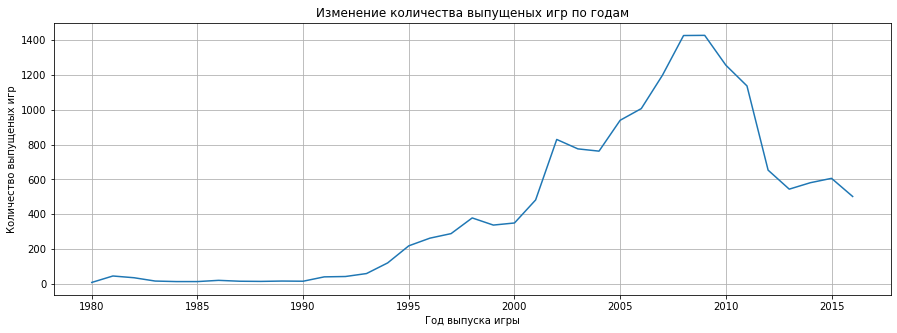

In [22]:
(df.groupby('year_of_release')['total_sales'].count().plot(figsize=(15,5), grid=True)
 .set(xlabel='Год выпуска игры', 
      ylabel='Количество выпущеных игр',  
      title='Изменение количества выпущеных игр по годам'));

In [23]:
df.groupby('platform')['total_sales'].count().sort_values(ascending=False)

platform
PS2     2126
DS      2121
PS3     1305
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: total_sales, dtype: int64

Так же посмотрим на суммарные продажи игр по годам.

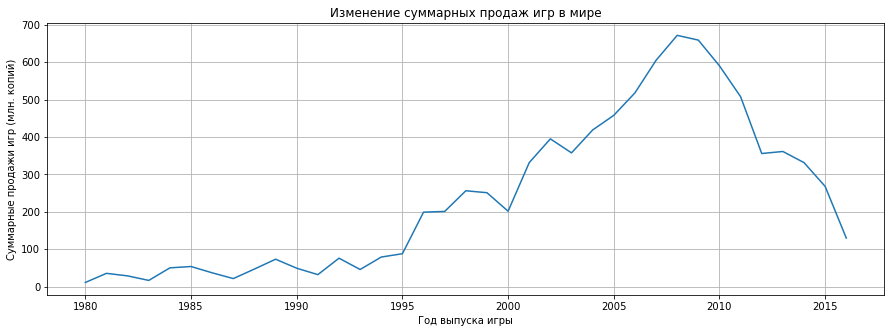

In [24]:
(df.groupby('year_of_release')['total_sales'].sum().plot(figsize=(15,5), grid=True)
 .set(xlabel='Год выпуска игры', 
      ylabel='Суммарные продажи игр (млн. копий)',  
      title='Изменение суммарных продаж игр в мире'));

In [25]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2     1233.559937
X360     961.239990
PS3      931.339966
Wii      891.179993
DS       802.780029
PS       727.580017
PS4      314.140015
GBA      312.880005
PSP      289.529999
3DS      257.809998
PC       255.759995
GB       254.429993
XB       251.569992
NES      251.050003
N64      218.009995
SNES     200.039993
GC       196.729996
XOne     159.320007
2600      86.480003
WiiU      82.190002
PSV       53.810001
SAT       33.590000
GEN       28.350000
DC        15.950000
SCD        1.860000
NG         1.440000
WS         1.420000
TG16       0.160000
3DO        0.100000
GG         0.040000
PCFX       0.030000
Name: total_sales, dtype: float32

По количеству выпущенных игр топ-5 платформ выглядит следующим образом: PS2, DS, PS3, Wii, X360. Однако не смотря на это по количеству проданных копий топ-5 выглядит по другому: PS2, X360, PS3, Wii, DS.

Посмотрим как во времени менялись продажи по отдельным платформам.

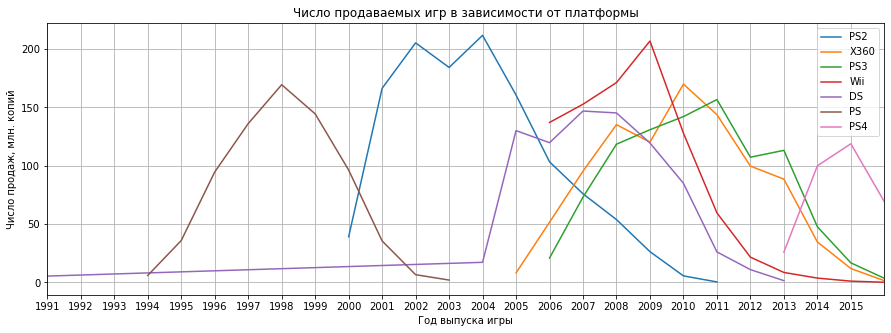

In [26]:
# создадим список top_platforms который содержит семь самых популярных платформ по числу проданых копий
top_platforms = (df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
                      .reset_index().loc[0:6, 'platform'])

for platform in top_platforms:
    (df[df['platform']==platform].groupby('year_of_release')['total_sales'].sum()
     .plot(figsize=(15,5), label=platform, legend=True, grid=True, xlim=(1991, 2016))
     .set(xlabel='Год выпуска игры', ylabel='Число продаж, млн. копий', 
          title='Число продаваемых игр в зависимости от платформы', xticks=range(1991, 2016))
    );


По графикам видно, что каждая платформа имеет свой жизненный цикл в процессе которого вначале количество продаваемых копий игр растет, а затем так же снижается. Если оценивать длительность жизненного цикла по поливене от максимума продаж, то для рассматриваемых платформ типовой жизненный цикл составляет порядка 5...10 лет. Для постоения прогноза на будующие периоды необходимо рассмативать только актуальные платфомы, а на платформы заканчивающие свой жизненный цикл обращать меньше внимания. Примем актуальный пеиод равный четыем годам (с 2013 по 2016). Сформируем новый датафрейм и посмотрим график популярности топ-7 платформ, но уже за последние четыре года.

In [27]:
df_actual = df[df['year_of_release']>=2013].copy()
df_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             2233 non-null   object  
 1   platform         2233 non-null   category
 2   year_of_release  2233 non-null   Int16   
 3   genre            2233 non-null   category
 4   na_sales         2233 non-null   float32 
 5   eu_sales         2233 non-null   float32 
 6   jp_sales         2233 non-null   float32 
 7   other_sales      2233 non-null   float32 
 8   critic_score     991 non-null    Int8    
 9   user_score       1192 non-null   float32 
 10  rating           1256 non-null   category
 11  total_sales      2233 non-null   float32 
dtypes: Int16(1), Int8(1), category(3), float32(6), object(1)
memory usage: 106.9+ KB


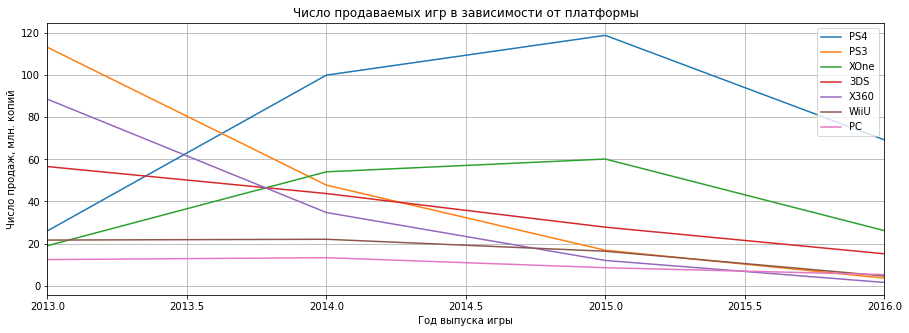

In [28]:
top_platforms = (df_actual.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
                      .reset_index().loc[0:6, 'platform'])

for platform in top_platforms:
    (df_actual[df_actual['platform']==platform].groupby('year_of_release')['total_sales'].sum()
     .plot(figsize=(15,5), label=platform, legend=True, grid=True, xlim=(2013, 2016))
     .set(xlabel='Год выпуска игры', ylabel='Число продаж, млн. копий', 
          title='Число продаваемых игр в зависимости от платформы')
    );

Из графика видно что в последние четыре года топ-7 платформ отличается от топ-7 платформ за все времена. С 2013 по 2016 годы набирает популярность платформы PS4 и XOne, а вот PS3 и X360 свой жизненный цикл заканчивают. Так же следет отметить что за последние четыре года продажи игр на платформах PC и WiiU остаются достаточно стабильными (данные за 2016 г не полные и график к 2016 году снижается для всех платформ в основном из-за этого).

Посмотрим на глобальные продажи за последние четыре года в разбивке по платформам

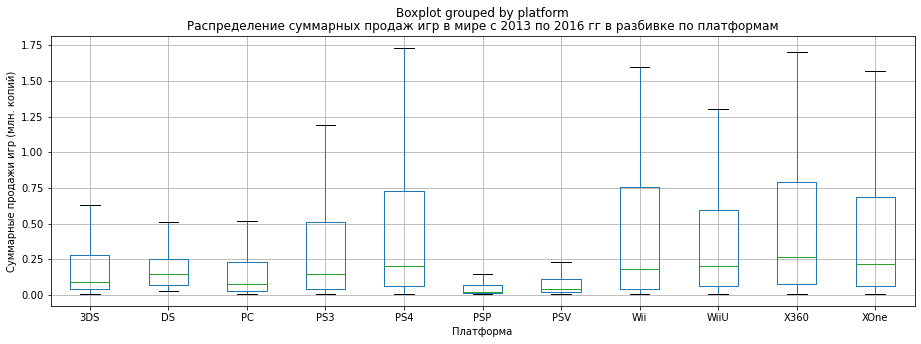

In [29]:
# временно изменим тип столбца platform с category на object для того чтобы boxplot отобажал только те платфомы которые есть в 
# актуальной выборке
df_actual['platform'] = df_actual['platform'].astype('object')

# отключим предупреждения
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

(df_actual.boxplot(column='total_sales', by='platform', figsize=(15,5), showfliers=False)
 .set(xlabel='Платформа', 
      ylabel='Суммарные продажи игр (млн. копий)',  
      title='Распределение суммарных продаж игр в мире с 2013 по 2016 гг в разбивке по платформам'));

# изменим тип столбца platform обратно на category
df_actual['platform'] = df_actual['platform'].astype('category')

Рассматривая график приведенный выше можно сказать, что большинство платформ имеющихся в датасете к рассматриваемому периоду стали неактуальны. Анализируя распределения по актуальным платформам так же можно заключит что все они имеют длинные хвосты т.е. большая часть выпускаемых игр имеет весьма небольшой тираж, однако есть отдельные "хиты" которые продаются огромными тиражами. Для примера рассмотрим гистограмму распределения продаж для платформы PS4

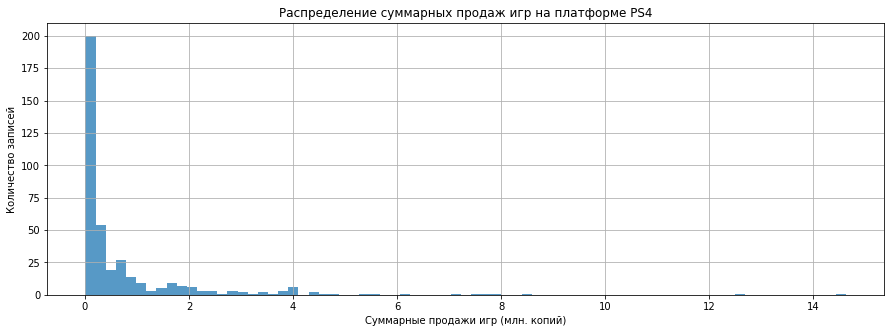

In [30]:
(df_actual[df_actual['platform']=='PS4']['total_sales'].hist(bins=75, figsize=(15, 5), alpha = 0.75)
 .set(xlabel='Суммарные продажи игр (млн. копий)', 
      ylabel='Количество записей',  
      title='Распределение суммарных продаж игр на платформе PS4'));

In [31]:
df_actual[df_actual['platform']=='PS4']['total_sales'].describe()

count    392.000000
mean       0.801377
std        1.609457
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64

In [32]:
df_actual[(df_actual['platform']=='PS4') & (df_actual['total_sales']>=10)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,14.630000
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.620001


50% игр на платформе PS4 продается тиражем не более 0,2 млн. копий, 75% не более 0,73 млн. Однако два "хита" Call of Duty: Black Ops 3 и Grand Theft Auto V продавались более чем 10 мил. раз каждый.

Рассмотрим как  влияют на продажи игр на платформе PS4 оценки пользователей и критиков. Для этого оценим корреляционную матрицу

In [33]:
df_actual[df_actual['platform']=='PS4'].corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.248961,-0.208306,-0.060993,-0.234796,-0.021142,0.152447,-0.235032
na_sales,-0.248961,1.000000,0.785362,0.472981,0.944259,0.415008,-0.020933,0.928160
eu_sales,-0.208306,0.785362,1.000000,0.464563,0.944698,0.346720,-0.048925,0.958157
jp_sales,-0.060993,0.472981,0.464563,1.000000,0.496467,0.322358,0.171332,0.527129
other_sales,-0.234796,0.944259,0.944698,0.496467,1.000000,0.409191,-0.035639,0.998051
critic_score,-0.021142,0.415008,0.346720,0.322358,0.409191,1.000000,0.557654,0.406568
user_score,0.152447,-0.020933,-0.048925,0.171332,-0.035639,0.557654,1.000000,-0.031957
total_sales,-0.235032,0.928160,0.958157,0.527129,0.998051,0.406568,-0.031957,1.000000


Интересно, что наблюдается прямая корреляция между общими продажами игр и оценкой критиков (коээффицент корреляции 0,4), однако имеется практичкски нулевая связь между продажами и оценкой пользователей. Возможно это связано с тем что большинство пользователей пишут отзывы уже после того как купили игру и потратили на нее какое-то время. Помотрим на график зависимости числа продаж от оценки критиков

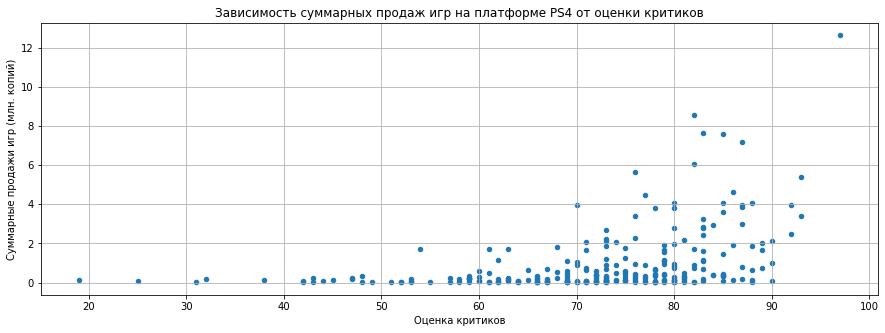

In [34]:
(df_actual[df_actual['platform']=='PS4'].dropna(subset=['critic_score'])
 .plot(x='critic_score', y='total_sales', kind='scatter', figsize=(15,5), grid=True)
 .set(xlabel='Оценка критиков', 
      ylabel='Суммарные продажи игр (млн. копий)',  
      title='Зависимость суммарных продаж игр на платформе PS4 от оценки критиков'));

По графику видно, что большинство игр имеющих оценку критоков 60 и меньше имеют небольшие продажи. При оценке критиков 70 и выше вероятность получить "хит" значительно возрастает. Оценим является ли этот эффект существенным для всех платформ из актуального датасета или это только особенность платформы PS4. Для этого посмотрим корреляционную матрицу по всему актуальному датасету

In [35]:
df_actual.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.124551,-0.087983,-0.074142,-0.090225,0.064322,0.039318,-0.117878
na_sales,-0.124551,1.000000,0.769995,0.264513,0.817367,0.301130,-0.020010,0.922617
eu_sales,-0.087983,0.769995,1.000000,0.244616,0.934796,0.280785,-0.027040,0.928031
jp_sales,-0.074142,0.264513,0.244616,1.000000,0.195192,0.134143,0.194025,0.434394
other_sales,-0.090225,0.817367,0.934796,0.195192,1.000000,0.275289,-0.011500,0.921370
critic_score,0.064322,0.301130,0.280785,0.134143,0.275289,1.000000,0.502221,0.313700
user_score,0.039318,-0.020010,-0.027040,0.194025,-0.011500,0.502221,1.000000,-0.002608
total_sales,-0.117878,0.922617,0.928031,0.434394,0.921370,0.313700,-0.002608,1.000000


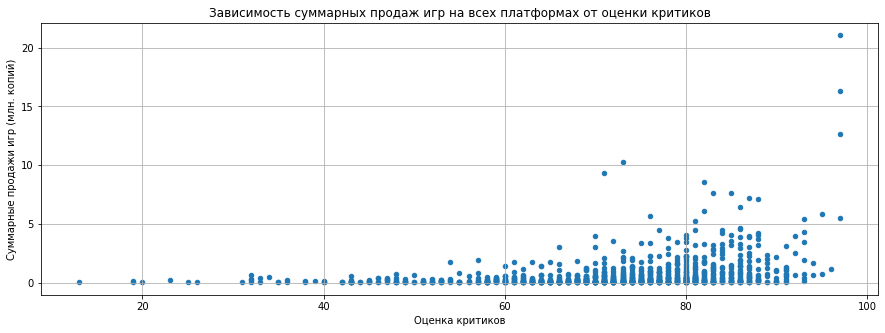

In [36]:
(df_actual.dropna(subset=['critic_score'])
 .plot(x='critic_score', y='total_sales', kind='scatter', figsize=(15,5), grid=True)
 .set(xlabel='Оценка критиков', 
      ylabel='Суммарные продажи игр (млн. копий)',  
      title='Зависимость суммарных продаж игр на всех платформах от оценки критиков'));

По всему актуальному датасету кореляция между числом продаж и оценкой критиков несколько уменьшилась (0,3) однако по прежнему при оценке критиков выше 70 наблюдается значительный рост количества выбросов (игр с высокими продажами, "хитов").
Таким образом оценка критиков является существенным параметром определяющим успешность продаж.

### Распределение игр по жанрам

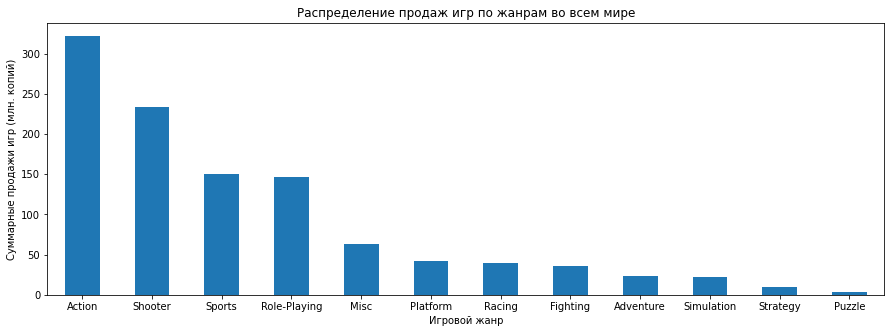

In [37]:
(df_actual.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(15,5), rot=0)
 .set(xlabel='Игровой жанр', 
      ylabel='Суммарные продажи игр (млн. копий)',
      title='Распределение продаж игр по жанрам во всем мире'));

In [38]:
df_actual.groupby('genre')['total_sales'].agg(['sum', 'mean', 'count']).sort_values(by='sum', ascending=False)

,sum,mean,count
genre,,,
Action,321.869995,0.420196,766
Shooter,232.979996,1.245882,187
Sports,150.649994,0.703972,214
Role-Playing,145.889999,0.499623,292
Misc,62.820000,0.405290,155
Platform,42.630001,0.576081,74
Racing,39.889999,0.469294,85
Fighting,35.310001,0.441375,80
Adventure,23.639999,0.096490,245


Наиболее прибыльными жанрами за последние 4 года из рассматриваемых являются (в порядке убывания) Action, Shooter, Sports, Role-Playing. Данные четыре жанра занимают 78% мировых продаж. Наиболее низкие продажи при тех же условиях наблюдаются в жанрах (в порядке убывания) Adventure, Simulation, Strategy, Puzzle.

<a id='section4'></a>

## Шаг 4. Оценка портрета пользователя каждого региона (NA, EU, JP)
### Оценка портрета пользователя Северной Америки (NA)
**Оценка Топ-5 популярных платформ**

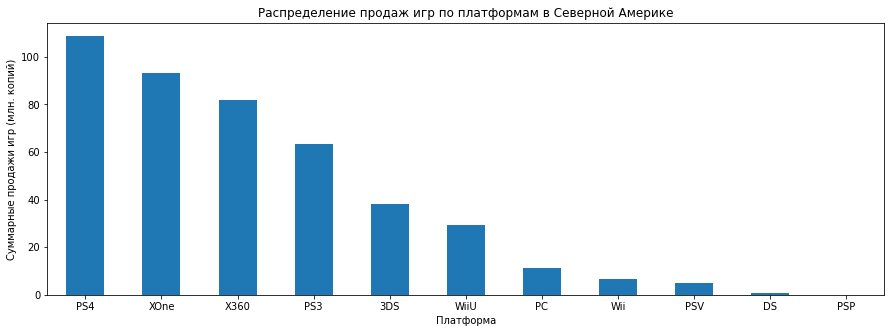

In [39]:
(df_actual.groupby('platform')['na_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(15,5), rot=0)
 .set(xlabel='Платформа',
      ylabel='Суммарные продажи игр (млн. копий)',
      title='Распределение продаж игр по платформам в Северной Америке'));

In [40]:
df_actual.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head()

platform
PS4     108.739998
XOne     93.120003
X360     81.659996
PS3      63.500000
3DS      38.200001
Name: na_sales, dtype: float32

**Оценка Топ-5 популярных игровых жанров**

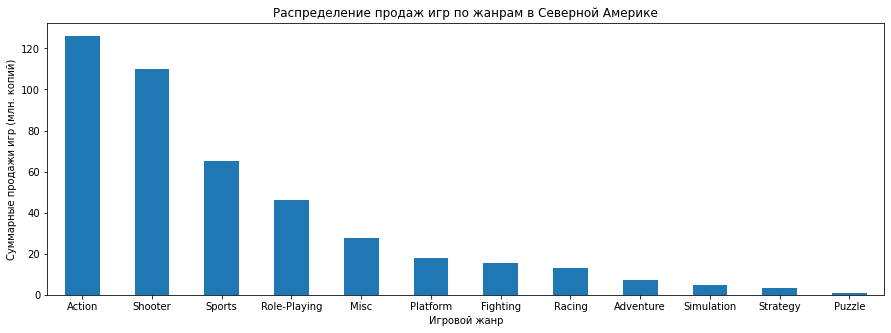

In [41]:
(df_actual.groupby('genre')['na_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(15,5), rot=0)
 .set(xlabel='Игровой жанр', 
      ylabel='Суммарные продажи игр (млн. копий)',
      title='Распределение продаж игр по жанрам в Северной Америке'));

In [42]:
df_actual.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()

genre
Action          126.050003
Shooter         109.739998
Sports           65.269997
Role-Playing     46.400002
Misc             27.490000
Name: na_sales, dtype: float32

В Северной Америке более трех четвертей рынка занимают четыре платформы: PS4, XOne, X360, PS3. Наиболее популярные игровые жанры в Северной Америке соответствуют общемировым (Action, Shooter, Sports, Role-Playing)

### Оценка портрета пользователя в Европе (EU)
**Оценка Топ-5 популярных платформ**

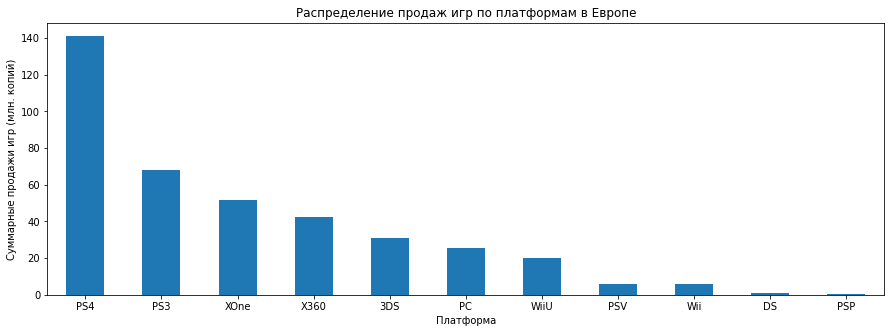

In [43]:
(df_actual.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(15,5), rot=0)
 .set(xlabel='Платформа',
      ylabel='Суммарные продажи игр (млн. копий)',
      title='Распределение продаж игр по платформам в Европе'));

In [44]:
df_actual.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head()

platform
PS4     141.089996
PS3      67.809998
XOne     51.590000
X360     42.520000
3DS      30.959999
Name: eu_sales, dtype: float32

**Оценка Топ-5 популярных игровых жанров**

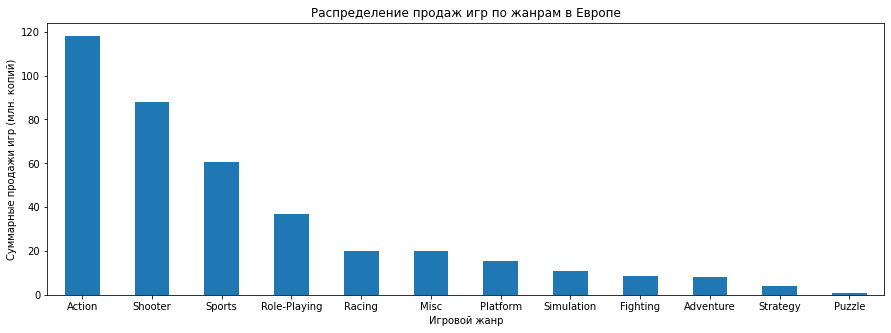

In [45]:
(df_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(15,5), rot=0)
 .set(xlabel='Игровой жанр', 
      ylabel='Суммарные продажи игр (млн. копий)',
      title='Распределение продаж игр по жанрам в Европе'));

In [46]:
df_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head()

genre
Action          118.129997
Shooter          87.860001
Sports           60.520000
Role-Playing     36.970001
Racing           20.190001
Name: eu_sales, dtype: float32

В Европе более трех четвертей рынка занимают четыре платформы: PS4, PS3, XOne, X360. Несмотря на то, что топ-4 игровых платформ такие же как и в Северной Америке, порядок их следования (по количеству продаж игр) иной. Если в Северной Америке заканчивающие свой жизненный цикл платформы (X360 и PS3) имеют меньшую долю продаж, то в Европе PS3 занимает второе место по продажам, что говорит о некотором временном лаге между распространением трендов из Севеной Америки в Европу. Наиболее популярные игровые жанры в Европе соответствуют общемировым (Action, Shooter, Sports, Role-Playing)

### Оценка портрета пользователя в Японии (JP)
**Оценка Топ-5 популярных платформ**

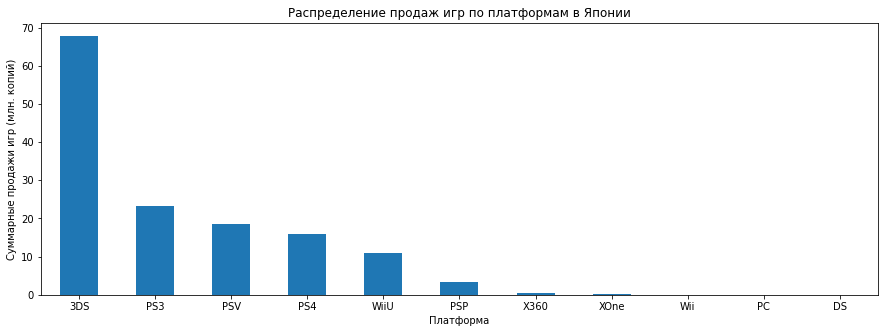

In [47]:
(df_actual.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(15,5), rot=0)
 .set(xlabel='Платформа',
      ylabel='Суммарные продажи игр (млн. копий)',
      title='Распределение продаж игр по платформам в Японии'));

In [48]:
df_actual.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head()

platform
3DS     67.809998
PS3     23.350000
PSV     18.590000
PS4     15.960000
WiiU    10.880000
Name: jp_sales, dtype: float32

**Оценка Топ-5 популярных игровых жанров**

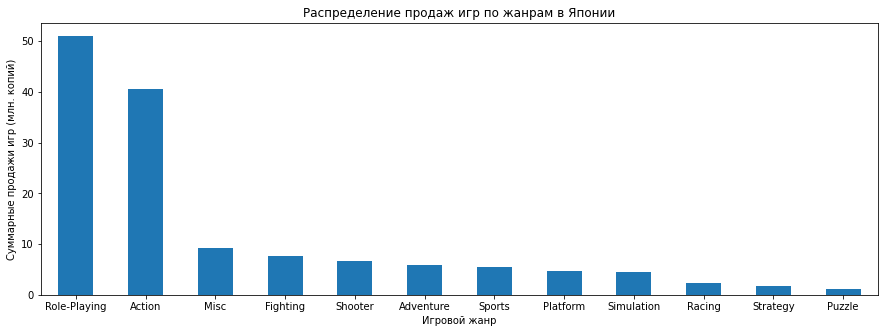

In [49]:
(df_actual.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(15,5), rot=0)
 .set(xlabel='Игровой жанр', 
      ylabel='Суммарные продажи игр (млн. копий)',
      title='Распределение продаж игр по жанрам в Японии'));

In [50]:
df_actual.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head()

genre
Role-Playing    51.040001
Action          40.490002
Misc             9.200000
Fighting         7.650000
Shooter          6.610000
Name: jp_sales, dtype: float32

В Японии более трех четвертей рынка занимают три платформы: 3DS, PS3, PSV. Рынок Японии координально отличается от рынков Европы и Северной Америки. Особую популяность в Японии имет платфома 3DS от японской комании Nintendo (доля приближается к половине рынка). А популярными в Европе и Северной Америке платформами от Microsoft (XOne, X360) японские геймеры практически не пользуются. Так же в Японии отличается структура потребления игр по жанрам. В основном японцы предпочитат жанры Role-Playing и Action, а вот популярные в остальном мире жаны Shooter и Sports японцы приобретают со значительно меньшим энтузиазмом.

### Оценка влияния рейтинга ESRB на продажи в отдельном регионе
Прежде чем перейти к оценке влияния рейтинга ESRB на продажи в отдельном регионе посмотрим какие значения может принимать столбец rating.

In [51]:
df_actual['rating'].unique()

['M', NaN, 'E', 'T', 'E10+']
Categories (4, object): ['M', 'E', 'T', 'E10+']

Видно что основные возрастные категории это M, E, T, E10+. Однако помимо этих возрастных категорий столбец содержит игры с неопределенным возрастным рейтингом (NaN). Заполним ячейки с неуказанным возрастным рейтингом значением Unknown

In [52]:
df_actual['rating'] = df_actual['rating'].astype('object').fillna('Unknown').astype('category')

# проверим что столбец rating больше не содержит незаполненных значений
df_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             2233 non-null   object  
 1   platform         2233 non-null   category
 2   year_of_release  2233 non-null   Int16   
 3   genre            2233 non-null   category
 4   na_sales         2233 non-null   float32 
 5   eu_sales         2233 non-null   float32 
 6   jp_sales         2233 non-null   float32 
 7   other_sales      2233 non-null   float32 
 8   critic_score     991 non-null    Int8    
 9   user_score       1192 non-null   float32 
 10  rating           2233 non-null   category
 11  total_sales      2233 non-null   float32 
dtypes: Int16(1), Int8(1), category(3), float32(6), object(1)
memory usage: 185.7+ KB


**Северная Америка (NA)**

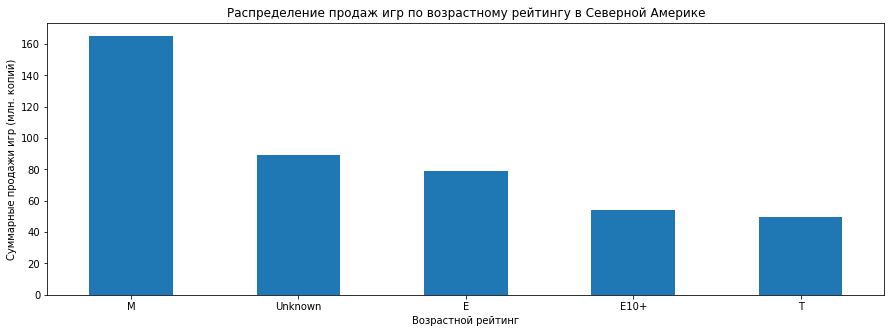

In [53]:
(df_actual.groupby('rating')['na_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(15,5), rot=0)
 .set(xlabel='Возрастной рейтинг', 
      ylabel='Суммарные продажи игр (млн. копий)',
      title='Распределение продаж игр по возрастному рейтингу в Северной Америке'));

In [54]:
df_actual.groupby('rating')['na_sales'].agg(['count', 'mean', 'median', 'sum']).sort_values(by='sum', ascending=False)

,count,mean,median,sum
rating,,,,
M,369,0.447724,0.14,165.210007
Unknown,977,0.091525,0.00,89.419998
E,302,0.261755,0.05,79.050003
E10+,252,0.215238,0.12,54.240002
T,333,0.149520,0.04,49.790001


Большую часть продаж в Северной Америке занимают игры с рейтингом M («Mature» — «Для взрослых»), оставшуюся часть делят между собой игры с рейтингами E («Everyone» — «Для всех»), E10+ («Everyone 10 and older» — «Для всех от 10 лет и старше») и T («Teen» — «Подросткам»)

**Европа (EU)**

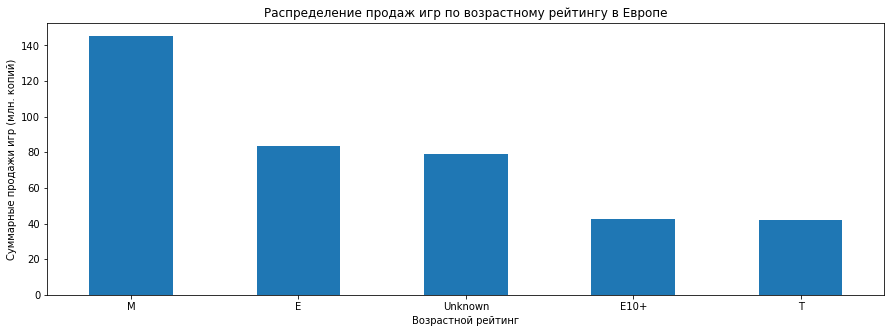

In [55]:
(df_actual.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(15,5), rot=0)
 .set(xlabel='Возрастной рейтинг', 
      ylabel='Суммарные продажи игр (млн. копий)',
      title='Распределение продаж игр по возрастному рейтингу в Европе'));

In [56]:
df_actual.groupby('rating')['eu_sales'].agg(['count', 'mean', 'median', 'sum']).sort_values(by='sum', ascending=False)

,count,mean,median,sum
rating,,,,
M,369,0.393821,0.130,145.320007
E,302,0.276026,0.055,83.360001
Unknown,977,0.080768,0.000,78.909996
E10+,252,0.169405,0.100,42.689999
T,333,0.125976,0.040,41.950001


Структура потребления игр в Европе по возрастному рейтингу в целом соответствует структуре потребления в Северной Америке

**Япония (JP)**

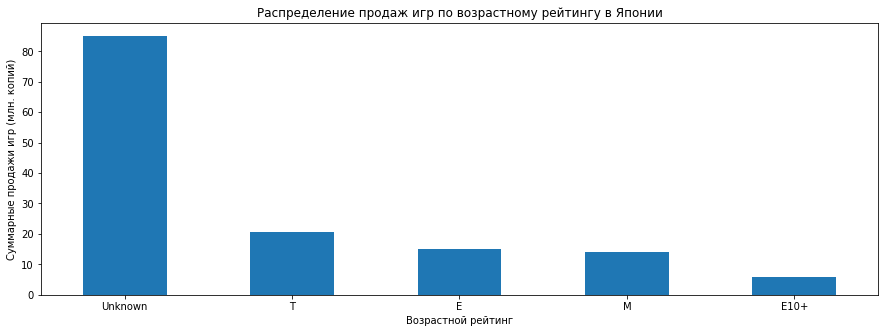

In [57]:
(df_actual.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(15,5), rot=0)
 .set(xlabel='Возрастной рейтинг', 
      ylabel='Суммарные продажи игр (млн. копий)',
      title='Распределение продаж игр по возрастному рейтингу в Японии'));

In [58]:
df_actual.groupby('rating')['jp_sales'].agg(['count', 'mean', 'median', 'sum']).sort_values(by='sum', ascending=False)

,count,mean,median,sum
rating,,,,
Unknown,977,0.087052,0.02,85.050003
T,333,0.061832,0.01,20.590000
E,302,0.050132,0.00,15.140000
M,369,0.038238,0.00,14.110000
E10+,252,0.023373,0.00,5.890000


В случае рейтинга, как и в случае платформ и жанров, рынок Японии имеет отличную структуру от рынков Европы и Северной Америки.
Наибольшую долю имеют игры с рейтингом T («Teen» — «Подросткам»), второе место в доле продаж занимают игры с рейтингом E («Everyone» — «Для всех»); третье и четвертое места делят M («Mature» — «Для взрослых») и E10+ («Everyone 10 and older» — «Для всех от 10 лет и старше»). Высокая доля продаж игр с неустановленным рейтингом от ESRB может быть объяснено тем, что в Японии имеется своя рейтинговая организация (CERO), которая выполняет аналогичные функции.

<a id='section5'></a>

## Шаг 5. Проверка гипотез
### Провека гиотезы о равенстве средних пользовательских рейтингов платформ Xbox One и PC
Проверку гиотезы будем проводить исользуя статистический критерий Стьюдента. Выдвенем следующие гипотезы:

    H0: Средние пользовательские рейтинги платформ Xbox One и PC равны.
    
    H1: Средние пользовательские рейтинги платформ Xbox One и PC отличаются.

In [59]:
df_actual[(df_actual['platform']=='XOne') & (df_actual['user_score'].notna())]['user_score'].describe()

count    182.000000
mean       6.521427
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [60]:
df_actual[(df_actual['platform']=='PC') & (df_actual['user_score'].notna())]['user_score'].describe()

count    155.000000
mean       6.269676
std        1.742381
min        1.400000
25%        5.300000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

In [61]:
from scipy import stats as st

alpha = 0.05

stat, p = st.levene(df_actual[(df_actual['platform']=='XOne') & (df_actual['user_score'].notna())]['user_score'],
                 df_actual[(df_actual['platform']=='PC') & (df_actual['user_score'].notna())]['user_score'])
print('Вероятность того, что дисесии двух выборок одинаковые:', p)

results = st.ttest_ind(df_actual[(df_actual['platform']=='XOne') & (df_actual['user_score'].notna())]['user_score'],
                       df_actual[(df_actual['platform']=='PC') & (df_actual['user_score'].notna())]['user_score'],
                       equal_var=False)

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC отвергнута')
else:
    print('Не получилось отвергнуть гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC')

Вероятность того, что дисесии двух выборок одинаковые: 0.00389754886889314
p-значение:  0.14759702913383088
Не получилось отвергнуть гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC


Таким образом имеется отличная от нуля вероятность, что средние пользовательские рейтинги платформ Xbox One и PC равны.

### Провека гиотезы об отличии средних пользовательских рейтингов жанов Action и Sports
Проверку гиотезы будем проводить исользуя статистический критерий Стьюдента. Выдвенем следующие гипотезы:

    H0: Средние пользовательские рейтинги жанов Action и Sports равны.
    
    H1: Средние пользовательские рейтинги жанов Action и Sports отличаются.

In [62]:
df_actual[(df_actual['genre']=='Action') & (df_actual['user_score'].notna())]['user_score'].describe()

count    389.000000
mean       6.837538
std        1.330173
min        2.000000
25%        6.300000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [63]:
df_actual[(df_actual['genre']=='Sports') & (df_actual['user_score'].notna())]['user_score'].describe()

count    160.000000
mean       5.238124
std        1.783427
min        0.200000
25%        4.100000
50%        5.500000
75%        6.500000
max        8.800000
Name: user_score, dtype: float64

In [64]:
alpha = 0.05

stat, p = st.levene(df_actual[(df_actual['platform']=='XOne') & (df_actual['user_score'].notna())]['user_score'],
                 df_actual[(df_actual['platform']=='PC') & (df_actual['user_score'].notna())]['user_score'])
print('Вероятность того, что дисесии двух выборок одинаковые:', p)

results = st.ttest_ind(df_actual[(df_actual['genre']=='Action') & (df_actual['user_score'].notna())]['user_score'],
                       df_actual[(df_actual['genre']=='Sports') & (df_actual['user_score'].notna())]['user_score'],
                       equal_var=False)

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Гипотеза о равенстве средних пользовательских рейтингов жанов Action и Sports отвергнута')
else:
    print('Не получилось отвергнуть гипотезу о равенстве средних пользовательских рейтингов жанов Action и Sports')

Вероятность того, что дисесии двух выборок одинаковые: 0.00389754886889314
p-значение:  1.445999656754529e-20
Гипотеза о равенстве средних пользовательских рейтингов жанов Action и Sports отвергнута


Гипотеза о равенстве средних пользовательских рейтингов жанов Action и Sports отвергнута т.е. средние пользовательские рейтинги жанов Action и Sports отличаются.

<a id='section6'></a>

## Шаг 6. Выводы

**В процессе данного исследования были проведены следующие работы:**
1. Проведен обзор предоставленных данных, изучена общая информация
2. Проведена подготовка данных, заменены типы данных, обработаны пропуски
3. Оценено как менялись продажи по различным платформам во времени, выбран актуальный период для проведения дальнейшего исследования, оценено как влияют на продажи отзывы пользователей и критиков, выявлены жанры с высокими и низкими продажами
4. Составлены портреты пользователей каждого региона (Северная Америка, Европа, Япония)
5. Проверены гипотезы о том что средние пользовательские рейтинги платформ Xbox One и PC одинаковые и средние пользовательские рейтинги жанров Action и Sports разные.

**По результатам исследования установлено:**
* Исторически наиболее популярными платформами (по количеству выпущенных игр) являются PS2 и DS. Только на эти две платформы приходится более четверти выпущеных за все время в мире игр. 
* За все время наблюдения по количеству выпущенных игр топ-5 платформ выглядит следующим образом: PS2, DS, PS3, Wii, X360. Однако не смотря на это по количеству проданных копий топ-5 выглядит по другому: PS2, X360, PS3, Wii, DS.
* Исторически наиболее часто встречающимися жанрами игр являются Action и Sports. На эти два жанра приходится более трети выпущенных в мире игр.
* Каждая платформа имеет свой жизненный цикл в процессе которого вначале количество продаваемых копий игр растет, а затем так же снижается. Если оценивать длительность жизненного цикла по поливене от максимума продаж, то для рассматриваемых платформ типовой жизненный цикл составляет порядка 5...10 лет. В связи с этим в исследовании актуальный период был принят равным четырем годам.
* С 2013 по 2016 годы набирают популярность платформы PS4 и XOne, а вот PS3 и X360 свой жизненный цикл заканчивают.
* Наиболее прибыльными жанрами за последние 4 года являются (в порядке убывания) Action, Shooter, Sports, Role-Playing. Данные четыре жанра занимают 78% мировых продаж.
* Наблюдается прямая корреляция между общими продажами игр и оценкой критиков, однако имеется практичкски нулевая связь между продажами и оценкой пользователей. При оценке критиков 70 и выше вероятность получить игру с высокими продажами значительно возрастает.
* Портреты игроков в Севеной Америке и Европе очень похожи. В основном они предочитают платфомы от Sony (PS4, PS3) или Microsoft (XOne, X360) и игровые жанры популярные и во всем мире (Action, Shooter, Sports, Role-Playing). При этом основную долю продаж занимают игры с возрастным рейтингом M («Mature» — «Для взрослых»). Так же наблюдается некоторый временной лаг между распространением трендов из Севеной Америки в Европу.
* Портрет игрока в Японии сильно отличается от портрета игроков в  Севеной Америке и Европе. В Японии педочитают платфомы от Nintendo (3DS) и Sony (PS3, PSV). Указанные платфомы занимают более трех четвертей рынка. В основном японцы предпочитат жанры Role-Playing и Action, а вот популярные в остальном мире жаны Shooter и Sports японцы приобретают со значительно меньшим энтузиазмом. Наибольшую долю в продажах в Японии имеют игры с рейтингом T («Teen» — «Подросткам»).
*  В процессе иследований не получилось отвергнуть гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC. Средние пользовательские рейтинги платформ Xbox One и PC могут быть равны.
* В процессе исследования установлено, что средние пользовательские рейтинги жанов Action и Sports отличаются.


**При определении потенциально популярного продукта и планиовании рекламных компаний рекомендуется**
1. Обащать в внимание на текущий этап жизненного цикла платформы для которой выпущена игра. Наиболее перспективными являются платформы PS4 и XOne
2. Обращать внимание на оценки критиков. Чем выше оценка критиков тем больше вероятность что продукт может стать хитом.
3. Большее внимание сосредоточить на игровых жанрах Action, Shooter, Sports и Role-Playing
4. Учитывать особенности игрового потребления по регионам
